# Part II - Ford go bike data analysis presentation.
## by Beryl Chebet


## Investigation Overview

The overall goal of this project was to perform data analysis mainly focusing on data visualization techniques in the data analysis process. The project is divided into 2 parts :

     - The Part 1  is about performing exploratory data visualization  using python visualizaton      libraries to explore the dataset starting from plot of single variables building up to plots of  multiple varibles.
     - Part 2  is  a presentation about the main relationships,trends,and properties from the part 1 of the dataset.


## Dataset Overview
 The dataset used was the Fordgo bikesystem data which includes information about individual rides made in a bike sharing system covering the greater San Fransisco Bay area. I cleaned the dataset and used a few of the variables for visualizations. The variables used in the data analysis  are:
   
   - Duration.
   - User type.
   - Start hour.
   - Start day.


## Importing the cleaned dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
!pip install seaborn --upgrade
import seaborn as sb
sb.__version__

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


'0.11.2'

In [3]:
# load in the dataset into a pandas dataframe
forddata= pd.read_csv('ford_clean')


# Key Insights using visualizations

## Number of rides per user type.

> The user type is mostly a subscriber, meaning they  pay a  fee to use the biking service.

Text(0.5, 1.0, 'Number of rides per user type')

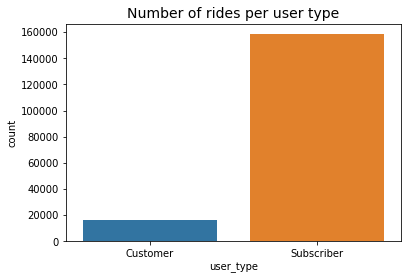

In [4]:

sb.countplot(data=forddata,x='user_type');
plt.title('Number of rides per user type', fontsize=14)

## Duration of rides per user type.

-  Subscribers generally take shorter trips, which majority of the rides lasting for 4 minutes and 6 minutes,
-  Subscribers and customers histograms are both right skewed,meaning the number of reduce as the duration for the rides increases.

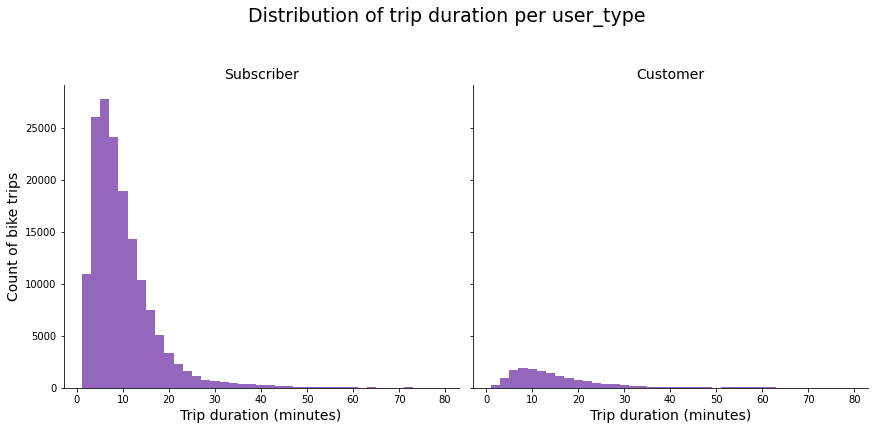

In [5]:
#plt.figure(figsize=(10,6))
duration_filter=forddata.query('duration_min<80')
g = sb.FacetGrid(data = duration_filter, col = 'user_type', col_wrap = 2, height = 6)
base_color = sb.color_palette()[4]

g.map(plt.hist, 'duration_min', bins = np.arange(duration_filter['duration_min'].min(), duration_filter['duration_min'].max()+1, 2), color = base_color)
g.set_ylabels('Count of bike trips', size=14)
g.set_xlabels('Trip duration (minutes)', size=14)
g.set_titles('{col_name}', size=14);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of trip duration per user_type', fontsize=19);

## User type and days of week.
- Without grouping by the user type,Thursdays and Tuesdays had the highest bikerides, while Saturdays   and Sundays had the least bike rides.
- If the user and duration is considered ,Duration of Trips on Weekends take longer than those during weekdays for Customers,with the highest duration being on a Sunday 27.78 minutes.
- Subscribers take shorter trips compared to Customers on all days of the week.


Text(0.5, 1.0, 'Bike Rides per day of the week')

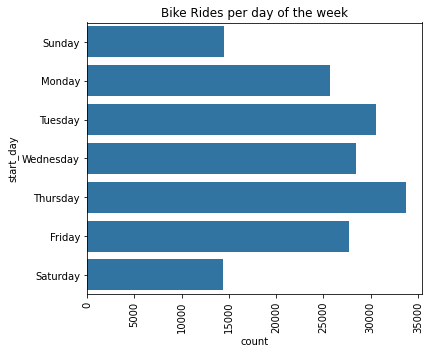

In [6]:
plt.figure(figsize=(6,5))
days_order= CategoricalDtype(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered= True)
forddata['start_day']=forddata['start_day'].astype(days_order)
base_color=sb.color_palette()[0]
sb.countplot(data=forddata,y='start_day',color=base_color);
plt.xticks(rotation=90)
plt.title('Bike Rides per day of the week')



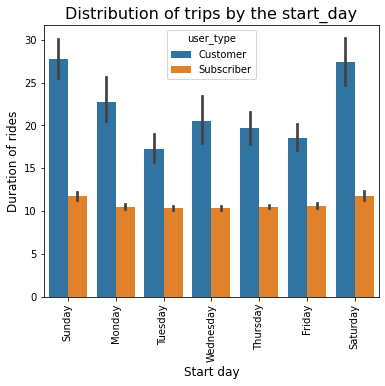

In [7]:
plt.figure(figsize=(6,5))
sb.barplot(data=forddata, x='start_day', y='duration_min', hue='user_type')
plt.xlabel('Start day', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day", fontsize=16);
plt.xticks(rotation=90);


## How the hourly usage varies during a week for Customers and Subscribers
### Customer
Customers have greater numbe rides on Thursdays, at 5pm,6pm and on Fridays, Thursday and Tuesday at 8am.

Over the wwekends on Saturday and Sunday most of the rides start between 12 pm and 4pm for the customer,


In [8]:
cust = forddata.query('user_type == "Customer"')#creating a new dataframe where user type is customer
ct_counts = cust.groupby(['start_day', 'start_hour']).size() #groups by start day and starthour returns number of rows and columns
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')#creating a pivot table with specified index,columns and index values


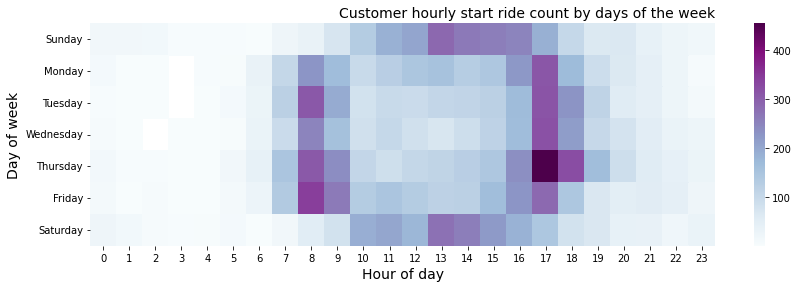

In [9]:
plt.figure(figsize=(14,9))
plt.subplot(2, 1, 1)
sb.heatmap(ct_counts, cmap="BuPu");
plt.title('Customer hourly start ride count by days of the week', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

### Subscriber
Majority of subscriber rides take place between 8 and 9  and 17 and 18hrs during the weekdays, 

Subscribers take significantly fewer rides during the weekends than during weekdays.


In [10]:
sub = forddata.query('user_type == "Subscriber"')
st_counts = sub.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')

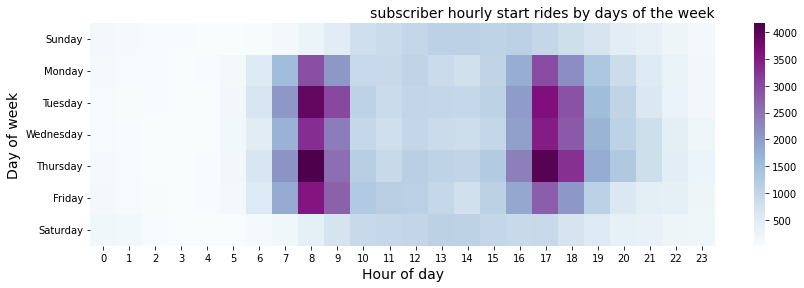

In [11]:
plt.figure(figsize=(14,9))
plt.subplot(2, 1, 2)
sb.heatmap(st_counts, cmap="BuPu");
plt.title('subscriber hourly start rides by days of the week', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 404825 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
